<center>
<h1>Udacity Project: <br/> Wrangle and Analyze Data<h1>
<h2> Roy Amante A. Salvador</h2>
</center>
<br/>

Data Wrangling is the process of collecting and massaging data into some format that's convenient for Data Analysis. It consists of three phases - Data Gathering, Assessment and Cleaning. The process is not strictly streamlined and can be an iterative one. In this project, we wrangle and provide some inghts on the WeRateDogs Twitter data.
    
# I. Gathering 
We collect our data from three different sources. 

## Flat File
First is from a flat comma separated (csv) file containing WeRateDogs archived tweets. In the real world, this represents data on hand which is readily available to us.

In [1533]:
# Import needed libraries
from IPython.core.display import display, HTML
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import json
%matplotlib inline

In [306]:
# WeRateDogs Twitter Archive
# Load from flat csv file
df_archive = pd.read_csv('twitter-archive-enhanced.csv')

## Downloaded from  the Internet
We have the tab separated (tsv) file downloaded from some online storage. This contains the tweet image predictions of some Machine Learning algorithm and used as a solution for missing information (i.e. breed).

In [99]:
# Tweet image predictions
# Programmatically download over the internet
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
filename = url.split('/')[-1]
response = requests.get(url)

# Save the file locally
with open(filename, mode='wb') as file :
       file.write(response.content)
        
# Load data from downloaded file
df_predictions = pd.read_csv(filename, sep='\t')

## Sourced from Twitter API
Finally, we have to also retrieve *retweet* and *favorite* counts in which we opted to create our own Twitter account with developer access. This denotes publicly available data in the event we need to find on our own.

In [108]:
# Set your twitter credentials
consumer_key = 'xxxxxxxxxxxxxxxxxx'
consumer_secret = 'xxxxxxxxxxxxxxxxxx'
access_token = 'xxxxxxxxxxxxxxxxxx'
access_secret = 'xxxxxxxxxxxxxxxxxx'

# Authenticate with tweepy
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, 
                 retry_count=1,
                 retry_errors=[88], # Rate limit reached
                 wait_on_rate_limit=True, 
                 wait_on_rate_limit_notify=True)

We attempt to query for each tweet record we have from our flat file.

In [110]:
# Extract and save tweet record for each tweet id in our archive
json_file = 'tweet_json.txt'
with open(json_file, mode='w', encoding='utf-8') as file :
    
    for i, tweet_id in enumerate(df_archive['tweet_id']) :
        try :
            print('Processing ' +str(i+1) + '/' + str(len(df_archive['tweet_id'])) + ' tweets', end='\r')
            tweet = api.get_status(tweet_id, extended=True)
            file.write(str(tweet._json) + '\n')            
        except Exception as e: 
            print('Error with tweet ' + str(tweet_id) + ': ' + str(e))

Error with tweet 888202515573088257: [{'code': 144, 'message': 'No status found with that ID.'}]
Error with tweet 873697596434513921: [{'code': 144, 'message': 'No status found with that ID.'}]
Error with tweet 872668790621863937: [{'code': 144, 'message': 'No status found with that ID.'}]
Error with tweet 872261713294495745: [{'code': 144, 'message': 'No status found with that ID.'}]
Error with tweet 869988702071779329: [{'code': 144, 'message': 'No status found with that ID.'}]
Error with tweet 866816280283807744: [{'code': 144, 'message': 'No status found with that ID.'}]
Error with tweet 861769973181624320: [{'code': 144, 'message': 'No status found with that ID.'}]
Error with tweet 856602993587888130: [{'code': 144, 'message': 'No status found with that ID.'}]
Error with tweet 851953902622658560: [{'code': 144, 'message': 'No status found with that ID.'}]
Error with tweet 845459076796616705: [{'code': 144, 'message': 'No status found with that ID.'}]
Error with tweet 8447047884031

Rate limit reached. Sleeping for: 440


Error with tweet 758740312047005698: Failed to send request: ('Connection aborted.', OSError("(10054, 'WSAECONNRESET')",))
Error with tweet 754011816964026368: [{'code': 144, 'message': 'No status found with that ID.'}]
Error with tweet 680055455951884288: [{'code': 144, 'message': 'No status found with that ID.'}]


Rate limit reached. Sleeping for: 461


Error with tweet 676957860086095872: Failed to send request: ('Connection aborted.', OSError("(10054, 'WSAECONNRESET')",))


The tweet records are saved in json format which is the format returned by the API.

In [124]:
# Load data from saved file
data = []
with open(json_file, 'r', encoding='utf-8') as f:
    for line in f:
        # format the record into proper json 
        # i.e. double quotes instead of single quotes 
        l = eval(line.strip())
        data.append(l)

df_extended = pd.read_json(json.dumps(data))

# II. Assessment

We perform assessment on our primary data from `twitter-archive-enhanced.csv`. We consider data from the other two sources as supplementary data which will help complete our initial data.

The following pandas dataframe functions were used to initially perform visual and programmatic examination.

In [1165]:
# Visually inspect dataframe slice
df_archive.head(50)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [1166]:
# Programmatically inspect columns
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [1167]:
# Show missing values
df_archive.isnull().sum()

tweet_id                      0   
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                     0   
source                        0   
text                          0   
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                 59  
rating_numerator              0   
rating_denominator            0   
name                          0   
doggo                         0   
floofer                       0   
pupper                        0   
puppo                         0   
dtype: int64

In [1168]:
# Programmatically inspect numeric columns
# function can show stats of numeric column especially the range of each column
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [1169]:
# Check for duplicates. No duplicates found
df_archive[df_archive['tweet_id'].duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


We also used spreadsheet program Excel for a more meticulous visual check on our primary data `twitter-archive-enhanced.csv`. Here are the list of issues seen on our primary data.

## Data Quality

### Completeness
* Some records don't have corresponding images (expanded url).
* There is no information on the breed of the dog in the tweet 
* Missing other statistical fields for analysis like *retweet* and *favorite* count (can be retrieved from supplementary data)

### Validity 
* Some records are actually not original tweets (retweets)
* There is a rating with *rating_denominator* of zero
* The *floofer* field is of type string but should be boolean - whether dog is floofy (fluffy) or not.
* Some tweets have images but are not dog images

In [1170]:
# Show a sample tweet with a corresponding image that is not a dog
url = df_archive.query('tweet_id == 666051853826850816')['expanded_urls'].values[0]
display(HTML("""<a href=""" + url + """>Sample Not a Dog Image Tweet</a>"""))

### Accuracy
* There are *name* values that are not names. These values are not capitalized

In [1171]:
df_archive[df_archive['name'].str.contains('^[a-z]')]['name'].value_counts()

a               55
the             8 
an              7 
very            5 
just            4 
one             4 
quite           4 
mad             2 
actually        2 
not             2 
getting         2 
his             1 
such            1 
unacceptable    1 
officially      1 
life            1 
old             1 
incredibly      1 
my              1 
space           1 
light           1 
infuriating     1 
all             1 
by              1 
this            1 
Name: name, dtype: int64

* Some records were incorrectly tagged with more than one dog stage. According to Dogtionary, there are three dog stages - *pupper*, *puppo* and *doggo*.

In [1172]:
# Show a sample tweet where it should have been tagged 
multistage_record = df_archive.query('tweet_id == 855851453814013952')[['text', 'expanded_urls', 'doggo', 'puppo', 'pupper']]
print(multistage_record)

display(HTML("""<a href=""" + multistage_record['expanded_urls'].values[0] + """> Incorrectly tagged with more than on stage: """ +
             multistage_record['text'].values[0] + """</a>"""))

                                                                                                                                                               text  \
191  Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel   

                                                       expanded_urls  \
191  https://twitter.com/dog_rates/status/855851453814013952/photo/1   

     doggo  \
191  doggo   

     puppo  \
191  puppo   

    pupper  
191  None   


* Some tweets with floofy (fluffy) dogs are not tagged as floofer.

In [1173]:
# Show a sample tweet where it should have been tagged as floofer
floofy_record = df_archive.query('tweet_id == 796080075804475393')[['text', 'expanded_urls', 'floofer']]

display(HTML("""<a href=""" + floofy_record['expanded_urls'].values[0] + """> Floofer Value: """ +
             floofy_record['floofer'].values[0] + " - " +
             floofy_record['text'].values[0] + """</a>"""))

* Some ratings are parsed incorrectly 

In [1176]:
# Records with incorrect ratings found by visual examination 
incorrect_rating = [680494726643068929, 716439118184652801, 778027034220126208, 
                    786709082849828864, 740373189193256964, 722974582966214656,
                    682962037429899265, 666287406224695296, 810984652412424192]
df_archive[df_archive['tweet_id'].isin(incorrect_rating)][['tweet_id','text', 'rating_numerator', 'rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1662,682962037429899265,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,7,11
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10
2335,666287406224695296,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,1,2


### Consistency
* The ratings are not standard since there are different denominators.

## Data Tidiness
* The *text* column contains more than one variable - text and shortened urls.
* Three columns are present for variable dog stage - *pupper*, *puppo* and *doggo*

# III. Cleaning
We first create a copy of our data before cleaning and then address each issue we identified.

In [1177]:
df_archive_master = df_archive.copy()

### Data Quality 

#### 1) Completeness: Some records don't have corresponding images (expanded url).

##### Define
Drop the records with no corresponding images.

##### Code 

In [1178]:
# Pre-test
df_archive_master = df_archive_master[df_archive_master['expanded_urls'].notnull()]

##### Test

In [1179]:
# Should return zero
df_archive_master['expanded_urls'].isnull().sum()

0

#### 2) Completeness: There is no information on the breed of the dog in the tweet.

##### Define
Create and set breed field to the highest dog breed prediction if present. Merge master dataframe with the dog breed predictions.

##### Code 

In [1180]:
# Create copy
df_predictions_tmp = df_predictions.copy()

# Create breed column
df_predictions_tmp['breed'] = np.where(df_predictions_tmp['p1_dog'], df_predictions_tmp['p1'],
                              np.where(df_predictions_tmp['p2_dog'], df_predictions_tmp['p2'],
                              np.where(df_predictions_tmp['p3_dog'], df_predictions_tmp['p3'],
                              np.NaN
                              )))

# Beautify string value
df_predictions_tmp['breed'] = df_predictions_tmp['breed'].str.replace('_', ' ').str.title()

# Extract needed fields only
df_predictions_tmp = df_predictions_tmp[['tweet_id', 'breed']]

# Merge master dataframe with dog breed predictions
df_archive_master = pd.merge(df_archive_master, df_predictions_tmp, on='tweet_id', how='left')

##### Test

In [1181]:
# Must now have breed information
df_archive_master['breed'].value_counts().head()

Golden Retriever      173
Labrador Retriever    113
Pembroke              96 
Chihuahua             95 
Pug                   65 
Name: breed, dtype: int64

#### 3) Completeness: Missing other statistical fields for analysis like *retweet* and *favorite* count 

##### Define
Extract the two fields from the json data we got from Twitter API. Merge them to master dataframe.

##### Code 

In [1182]:
# Extract retweet and favorite counts
df_extended_tmp = df_extended[['id', 'retweet_count', 'favorite_count']]
df_extended_tmp = df_extended_tmp.rename(columns={'id': 'tweet_id'})

# Merge with master dataframe
df_archive_master = pd.merge(df_archive_master, df_extended_tmp, on='tweet_id', how='left')

##### Test

In [1183]:
# Must now have retweet and favorite counts information
print(df_archive_master['retweet_count'].value_counts().head())
print(df_archive_master['favorite_count'].value_counts().head())

506.0     6
2029.0    5
579.0     5
384.0     5
54.0      4
Name: retweet_count, dtype: int64
0.0       164
1737.0    4  
2264.0    4  
1621.0    3  
3463.0    3  
Name: favorite_count, dtype: int64


#### 4) Validity: Some records are actually not original tweets (retweets)

##### Define
Drop records that are tagged as retweets.

##### Code 

In [1184]:
# Drop retweets
df_archive_master = df_archive_master[df_archive_master['retweeted_status_id'].isnull()]

##### Test

In [1185]:
# Must return zero
len(df_archive_master[~df_archive_master['retweeted_status_id'].isnull()])

0

#### 5) Validity: There is a rating with rating_denominator of zero

##### Define
Drop non-positive rating denominators

##### Code 

In [1186]:
# Drop non positive rating denominators
df_archive_master = df_archive_master[df_archive_master['rating_denominator'] > 0]

##### Test

In [1187]:
# Must return zero
len(df_archive_master[df_archive_master['rating_denominator'] <= 0])

0

#### 6) Validity: The floofer field is of type string but should be boolean - whether dog is floofy (fluffy) or not.

##### Define
Convert the *floofer* field type from string to boolean. If the value is *'None'* then dog is not a floofer otherwise true.

##### Code 

In [1188]:
# Convert to boolean
df_archive_master['floofer'] = np.where( df_archive_master['floofer'] == 'None', False, True)

##### Test

In [1189]:
# Floofer column must be boolean type
df_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2296
Data columns (total 20 columns):
tweet_id                      2117 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2117 non-null object
source                        2117 non-null object
text                          2117 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2117 non-null int64
rating_denominator            2117 non-null int64
name                          2117 non-null object
doggo                         2117 non-null object
floofer                       2117 non-null bool
pupper                        2117 non-null object
puppo                         2117 non-null object
breed                         1686 non-n

#### 7) Validity: Some tweets have images but are not dog images

##### Define
Drop rows without predicted dog breed.

##### Code 

In [1190]:
# Drop tweets with no predicted dog breed
df_archive_master = df_archive_master[~df_archive_master['breed'].isnull()]

##### Test

In [1191]:
# Must return zero
len(df_archive_master[df_archive_master['breed'].isnull()])

0

#### 8) Accuracy: There are *name* values that are not names. These values are not capitalized

##### Define
Replace name values which start with lower case with *'None'*. 

##### Code 

In [1192]:
# Replace invalid names with nulls
df_archive_master.loc[df_archive_master['name'].str.contains('^[a-z]'), 'name'] = 'None'

##### Test

In [1193]:
# Must return zero
len(df_archive_master[df_archive_master['name'].str.contains('^[a-z]')])

0

#### 9) Accuracy: Some records are incorrectly tagged with more than one dog stage.


##### Define
Examine the text and image url of remaining records with more than one dog stage. Manually determine correct value and set the incorrect stage to 'None'

##### Code 

In [1194]:
# Setting to display full text
pd.set_option('display.max_colwidth', -1)

# List remaining records with more than one dog stage
df_doggo_puppo = df_archive_master[(df_archive_master['doggo'] == 'doggo') & 
                  (df_archive_master['puppo'] == 'puppo')][['tweet_id', 'text', 'doggo', 'puppo', 'pupper']]

df_doggo_pupper = df_archive_master[(df_archive_master['doggo'] == 'doggo') & 
                  (df_archive_master['pupper'] == 'pupper')][['tweet_id', 'text', 'doggo', 'puppo', 'pupper']]

df_puppo_pupper = df_archive_master[(df_archive_master['puppo'] == 'puppo') & 
                  (df_archive_master['pupper'] == 'pupper')][['tweet_id', 'text', 'doggo', 'puppo', 'pupper']]

df_doggo_puppo.append(df_doggo_pupper, ignore_index=True).append(df_puppo_pupper,ignore_index=True )

,tweet_id,text,doggo,puppo,pupper
0,855851453814013952,Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,doggo,puppo,None
1,817777686764523521,"This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",doggo,None,pupper
2,808106460588765185,Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,doggo,None,pupper
3,802265048156610565,"Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze",doggo,None,pupper
4,801115127852503040,This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,doggo,None,pupper
5,759793422261743616,"Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll",doggo,None,pupper
6,751583847268179968,Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,doggo,None,pupper
7,741067306818797568,This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,doggo,None,pupper
8,733109485275860992,"Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",doggo,None,pupper


In [1195]:
# Manually set proper tag per review
df_archive_master.loc[df_archive_master['tweet_id'] == 855851453814013952, 'doggo'] = 'None'
df_archive_master.loc[df_archive_master['tweet_id'] == 817777686764523521, 'doggo'] = 'None'
df_archive_master.loc[df_archive_master['tweet_id'] == 801115127852503040, 'doggo'] = 'None'
df_archive_master.loc[df_archive_master['tweet_id'] == 751583847268179968, 'pupper'] = 'None'

##### Test

In [1196]:
# Check remaining records with more than two stages 
# really have more than one dog in the image
print('Verify following tweets have more than two dogs in the image: ')

# List remaining records with more than one dog stage
df_doggo_puppo = df_archive_master[(df_archive_master['doggo'] == 'doggo') & 
                  (df_archive_master['puppo'] == 'puppo')][['tweet_id', 'text', 'expanded_urls']]

df_doggo_pupper = df_archive_master[(df_archive_master['doggo'] == 'doggo') & 
                  (df_archive_master['pupper'] == 'pupper')][['tweet_id', 'text', 'expanded_urls']]

df_puppo_pupper = df_archive_master[(df_archive_master['puppo'] == 'puppo') & 
                  (df_archive_master['pupper'] == 'pupper')][['tweet_id', 'text', 'expanded_urls']]

df_multistage = df_doggo_puppo.append(df_doggo_pupper, ignore_index=True).append(df_puppo_pupper,ignore_index=True )

df_multistage['expanded_urls'].str.replace(',', ' , ')

Verify following tweets have more than two dogs in the image: 


0    https://twitter.com/dog_rates/status/808106460588765185/photo/1                                                                  
1    https://twitter.com/dog_rates/status/802265048156610565/photo/1                                                                  
2    https://twitter.com/dog_rates/status/759793422261743616/photo/1 , https://twitter.com/dog_rates/status/759793422261743616/photo/1
3    https://twitter.com/dog_rates/status/741067306818797568/photo/1                                                                  
4    https://twitter.com/dog_rates/status/733109485275860992/photo/1                                                                  
Name: expanded_urls, dtype: object

#### 10) Accuracy: Some tweets with floofy (fluffy) dogs are not tagged as floofer.


##### Define
Relax criteria for tagging floofer based on tweet text. Set to floofer if text contained *floof* and *fluff* instead of just *floofer*.

##### Code 

In [1197]:
# Take note of count pre-cleaning
print('Precleaning floofer count:' + str(len(df_archive_master[ df_archive_master['floofer']])))

# Examine spotted sample that should have been tagged as floofer
print(df_archive_master.query('tweet_id == 796080075804475393')[['text', 'expanded_urls', 'floofer']])

df_archive_master.loc[ df_archive_master['text'].str.lower().str.contains('floof') | 
                       df_archive_master['text'].str.lower().str.contains('fluff'),
                       'floofer'] = True

Precleaning floofer count:8
                                                                          text  \
594  This is Yogi. He's 98% floof. Snuggable af. 12/10 https://t.co/opoXKxmfFm   

                                                       expanded_urls  \
594  https://twitter.com/dog_rates/status/796080075804475393/photo/1   

     floofer  
594  False    


##### Test

In [1198]:
# Must now be greater than precleaning floofer count
print('Postcleaning floofer count:' + str(len(df_archive_master[ df_archive_master['floofer']])))

# Sample should now be a floofer
print(df_archive_master.query('tweet_id == 796080075804475393')[['text', 'expanded_urls', 'floofer']])

Postcleaning floofer count:58
                                                                          text  \
594  This is Yogi. He's 98% floof. Snuggable af. 12/10 https://t.co/opoXKxmfFm   

                                                       expanded_urls  \
594  https://twitter.com/dog_rates/status/796080075804475393/photo/1   

     floofer  
594  True     


#### 11) Some ratings are parsed incorrectly 

##### Define
Reparse numerator and denominator ratings such that it will allow decimal values for numerator. Extract the occurrence matching the rating format nearest to the end of the text. Drop the record with no intended rating (tweet_id = 810984652412424192 )

##### Code 

In [1199]:
# Parse numerator anddenominator.
# Included some replace functions to help simplify regex needed
df_archive_master[['rating_numerator', 'rating_denominator']] = df_archive_master['text'] \
   .str.replace(r'http.*', '').str.replace(r'\D\.', '') \
   .str.extract(r'^(?s:^|.*[^\d\.])(?P<numerator>\d*\.?\d+)/(?P<denominator>\d+)')

# Convert to proper numeric types
df_archive_master['rating_numerator'] = df_archive_master['rating_numerator'].astype(float)
df_archive_master['rating_denominator'] = df_archive_master['rating_denominator'].astype(int)

# We drop the record tweet id = 810984652412424192
df_archive_master = df_archive_master[df_archive_master['tweet_id'] != 810984652412424192 ]

##### Test

In [1200]:
# Verify records with incorrect rating found by visual examination earlier are now fixed
df_archive_master[df_archive_master['tweet_id'].isin(incorrect_rating)][['tweet_id','text', 'rating_numerator', 'rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
667,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10
733,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10
1034,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",14.00,10
1130,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,13.00,10
1167,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,11.00,10
1616,682962037429899265,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,10.00,10
1664,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10
2276,666287406224695296,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,9.00,10


#### 12) Consistency: The ratings is not standard since there are different denominators.


##### Define
Create a normalized rating field by dividing numerator and denominator ratings.

##### Code 

In [1201]:
# Create new normalized rating column
df_archive_master['rating_normalized'] = df_archive_master['rating_numerator'] / df_archive_master['rating_denominator']

##### Test

In [1202]:
# Verify new field has been created
df_archive_master[['tweet_id', 'rating_numerator', 'rating_denominator', 'rating_normalized']]

,tweet_id,rating_numerator,rating_denominator,rating_normalized
1,892177421306343426,13.0,10,1.3
2,891815181378084864,12.0,10,1.2
3,891689557279858688,13.0,10,1.3
4,891327558926688256,12.0,10,1.2
5,891087950875897856,13.0,10,1.3
...,...,...,...,...
2292,666049248165822465,5.0,10,0.5
2293,666044226329800704,6.0,10,0.6
2294,666033412701032449,9.0,10,0.9
2295,666029285002620928,7.0,10,0.7


### Data Tidiness 

#### 1) The *text* column contains more than one variable - text and shortened urls.

##### Define
Scrub out the shortened urls in the text. Discard the shortened url since we already have expanded urls.   

##### Code 

In [1203]:
# Create column for shortened url
df_archive_master['text'] = df_archive_master['text'].str.replace(r'http.*', '')

##### Test

In [1204]:
# Verify text no longer has shortened urls
df_archive_master[['tweet_id', 'text']].head(10)

,tweet_id,text
1,892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10"
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10
3,891689557279858688,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us
4,891327558926688256,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek"
5,891087950875897856,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek
6,890971913173991426,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\n
7,890729181411237888,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10
8,890609185150312448,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek
9,890240255349198849,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate
10,890006608113172480,This is Koda. He is a South Australian deckshark. Deceptively deadly. Frighteningly majestic. 13/10 would risk a petting #BarkWeek


#### 2) Three columns are present for variable dog stage - *pupper*, *puppo* and *doggo*

##### Define
Create a single column for dog stage and populate based on the values in *pupper*, *puppo* and *doggo* columns. 

##### Code 

In [1205]:
df_test = df_archive_master.copy()
df_test['test'] = np.where(df_archive_master['doggo'] == 'doggo', df_archive_master['doggo'],
                              np.where(df_archive_master['puppo'] == 'puppo', df_archive_master['puppo'],
                              np.where(df_archive_master['pupper'] == 'pupper', df_archive_master['pupper'],
                              'None'
                              )))
df_test['test'].value_counts()

None      1432
pupper    170 
doggo     61  
puppo     22  
Name: test, dtype: int64

In [1206]:
# Create dog stage field
df_archive_master['dog_stage'] = df_archive_master['doggo'] + df_archive_master['puppo'] + df_archive_master['pupper']

# Replace 'None' with empty string
df_archive_master['dog_stage'] = df_archive_master['dog_stage'].str.replace('None', '')

# Prettify value for tweets with both doggo and pupper
df_archive_master['dog_stage'] = df_archive_master['dog_stage'].str.replace('doggopupper', 'doggo and pupper')

##### Test

In [1207]:
# Check dog_stage values
print(df_archive_master['dog_stage'].value_counts())

                    1432
pupper              170 
doggo               56  
puppo               22  
doggo and pupper    5   
Name: dog_stage, dtype: int64


### Further Cleaning and Saving


We further clean by dropping columns no longer needed for data analysis and save our cleaned dataframe to local file.

In [1208]:
# Drop unnecessary columns
df_archive_master = df_archive_master.drop(columns=
            ['in_reply_to_status_id', 'in_reply_to_user_id', # reply related fields
             'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp',  # retweet related fields
             'doggo', 'pupper', 'puppo' # old dog stage related fields
                               ])

# Check remaining columns
print(df_archive_master.info())

# Save cleaned dataframe
df_archive_master.to_csv('twitter_archive_master.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1685 entries, 1 to 2296
Data columns (total 14 columns):
tweet_id              1685 non-null int64
timestamp             1685 non-null object
source                1685 non-null object
text                  1685 non-null object
expanded_urls         1685 non-null object
rating_numerator      1685 non-null float64
rating_denominator    1685 non-null int32
name                  1685 non-null object
floofer               1685 non-null bool
breed                 1685 non-null object
retweet_count         1676 non-null float64
favorite_count        1676 non-null float64
rating_normalized     1685 non-null float64
dog_stage             1685 non-null object
dtypes: bool(1), float64(4), int32(1), int64(1), object(7)
memory usage: 179.4+ KB
None


# IV Analysis

### Questions

To gather insights, we post the following questions:
* How relevant are WeRateDogs and its ratings ?
* What affects the rating? breed? dog stage? being a floofer?
* What dog breed is the most popular? well-liked?

### Insights and Visualization

In [1331]:
# Load our clean data 
df = pd.read_csv('twitter_archive_master.csv')

# Create year month for trending
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['year-month'] = df['timestamp'].map(lambda x: str(x.year) + '-' + str(x.month).zfill(2))

WeRateDogs ratings have moderate positive correlation on both favorite and retweet counts. This means highly rated dog tweets have a tendency to be popular and more liked.

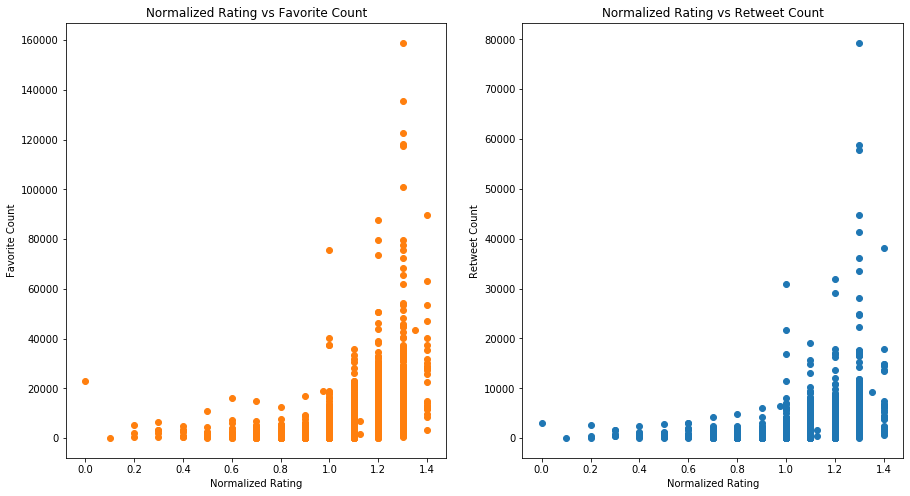

In [1535]:
# Render visualization
fig, axs = plt.subplots(1,2)

# vs Favorite Count
axs[0].set_title('Normalized Rating vs Favorite Count')
axs[0].set_ylabel('Favorite Count')
axs[0].set_xlabel('Normalized Rating');
axs[0].scatter(x=df['rating_normalized'], y=df['favorite_count'], color="tab:orange")

# vs Retweet Count
axs[1].set_title('Normalized Rating vs Retweet Count')
axs[1].set_ylabel('Retweet Count')
axs[1].set_xlabel('Normalized Rating');
axs[1].scatter(x=df['rating_normalized'], y=df['retweet_count'], color="tab:blue")

plt.rcParams["figure.figsize"] = (15,8);

If we look at the average favorite and retweet counts per tweet. we can say that WeRatesDog has increased in popularity over time garnering around 30,000 likes per tweet as of August 1, 2017.  

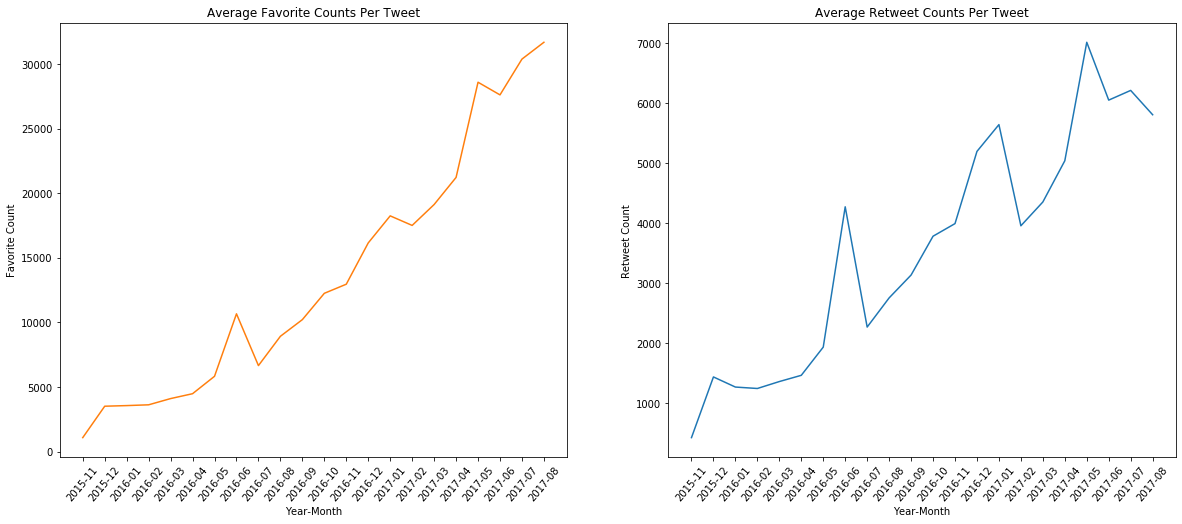

In [1591]:
avg_counts = df.groupby('year-month')[['favorite_count', 'retweet_count', 'rating_normalized']].mean().reset_index()

# Render visualization
fig, axs = plt.subplots(1,2)

# Favorite Count
axs[0].plot(list(avg_counts['year-month']), list(avg_counts['favorite_count']), color="tab:orange")
axs[0].set_xlabel('Year-Month') 
axs[0].set_ylabel('Favorite Count') 
axs[0].set_title('Average Favorite Counts Per Tweet')
axs[0].set_xticklabels(list(avg_counts['year-month']),rotation=50)

# Retweet Count
axs[1].plot(list(avg_counts['year-month']), list(avg_counts['retweet_count']), color="tab:blue")
axs[1].set_xlabel('Year-Month') 
axs[1].set_ylabel('Retweet Count')
axs[1].set_title('Average Retweet Counts Per Tweet')
axs[1].set_xticklabels(list(avg_counts['year-month']),rotation=50)

plt.rcParams["figure.figsize"] = (20,8);

The average normalized rating is going up over time. This may mean the overall memeable quality of submissions has been improving. This also further supports its positive correlation with favorite and retweet counts. 

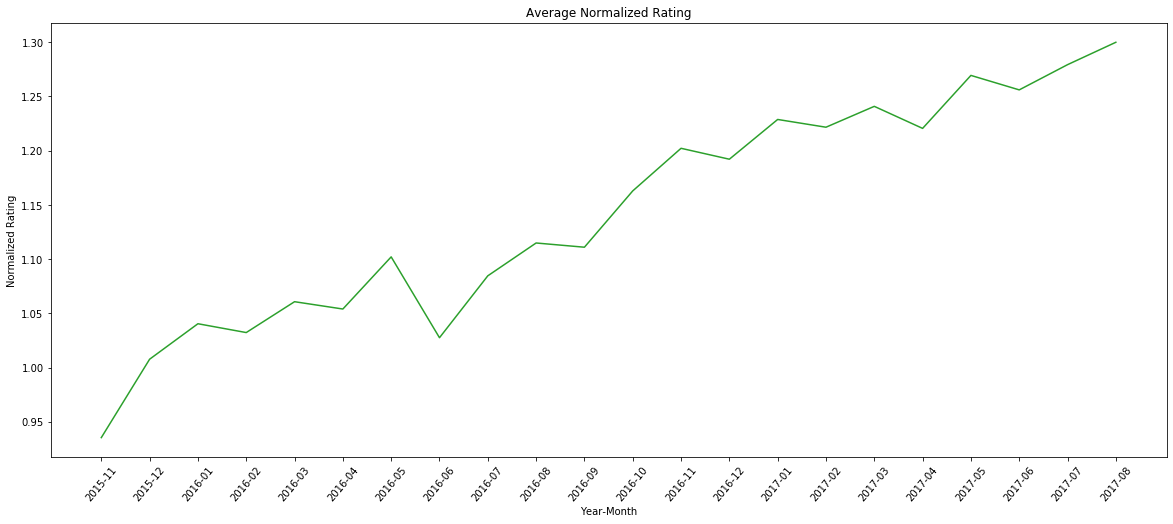

In [1592]:
# Normalized Rating Trend
plt.plot(list(avg_counts['year-month']), list(avg_counts['rating_normalized']), color="tab:green")
plt.xlabel('Year-Month') 
plt.ylabel('Normalized Rating') 
plt.title('Average Normalized Rating')
plt.xticks(rotation=50)
plt.rcParams["figure.figsize"] = (19,4);

*Floofer* dogs have slightly higher ratings compared to regular ones.

   floofer  \
0  False     
1  True      

   rating_normalized  
0  1.079765           
1  1.136207           


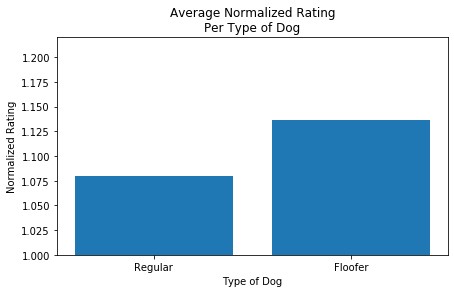

In [1586]:
# Compute average rating per dog stage
ave_floofer = df.groupby('floofer')['rating_normalized'].mean().reset_index()
print(ave_floofer)

# Render visualization
loc = np.arange(len(ave_floofer['floofer'])) 
plt.bar(loc, ave_floofer['rating_normalized'])
plt.ylabel('Normalized Rating') 
plt.ylim(bottom=1, top=1.22)
plt.xlabel('Type of Dog')
plt.xticks(loc, ['Regular', 'Floofer'] )
plt.title('Average Normalized Rating\nPer Type of Dog')
plt.rcParams["figure.figsize"] = (7,4);

Surprisingly, *puppers* tend to receive lower ratings than their mature counterparts. Perhaps *puppers* have not developed yet their full meme potential.

          dog_stage  \
0  doggo              
1  doggo and pupper   
2  pupper             
3  puppo              

   rating_normalized  
0  1.178571           
1  1.180000           
2  1.086629           
3  1.200000           


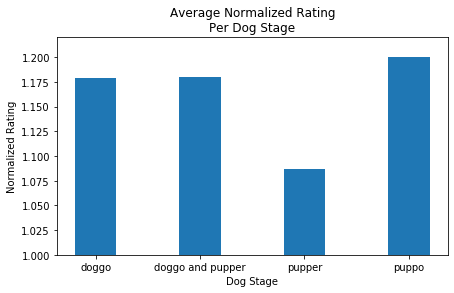

In [1568]:
# Compute average rating per dog stage
ave_dog_stage = df.groupby('dog_stage')['rating_normalized'].mean().reset_index()
print(ave_dog_stage)

# Render visualization
loc = np.arange(len(ave_dog_stage['dog_stage'])) * 2
plt.bar(loc, ave_dog_stage['rating_normalized'])
plt.ylabel('Normalized Rating') 
plt.ylim(bottom=1, top=1.22)
plt.xlabel('Dog Stage')
plt.xticks(loc, ave_dog_stage['dog_stage'] )
plt.title('Average Normalized Rating\nPer Dog Stage')
plt.rcParams["figure.figsize"] = (7,4);

The ones with the lowest ratings tend to be submissions which do not contain real dogs, distasteful, plagiarized or scenes which may pose danger to the dog.

In [1507]:
# Display tweets with the lowest ratings
df.sort_values(['rating_normalized'], ascending=True)\
    [['tweet_id', 'text', 'expanded_urls', 'rating_numerator', 'rating_denominator']].head(10)

,tweet_id,text,expanded_urls,rating_numerator,rating_denominator
208,835152434251116546,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10,"https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1",0.0,10
1576,668537837512433665,This is Spark. He's nervous. Other dog hasn't moved in a while. Won't come when called. Doesn't fetch well 8/10&amp;1/10,https://twitter.com/dog_rates/status/668537837512433665/photo/1,1.0,10
1240,678424312106393600,This is Crystal. She's a shitty fireman. No sense of urgency. People could be dying Crystal. 2/10 just irresponsible,https://twitter.com/dog_rates/status/678424312106393600/photo/1,2.0,10
941,703356393781329922,This is Socks. That water pup w the super legs just splashed him. Socks did not appreciate that. 9/10 and 2/10,https://twitter.com/dog_rates/status/703356393781329922/photo/1,2.0,10
1599,667878741721415682,This is Tedrick. He lives on the edge. Needs someone to hit the gas tho. Other than that he's a baller. 10&amp;2/10,https://twitter.com/dog_rates/status/667878741721415682/photo/1,2.0,10
811,718246886998687744,This is Alexanderson. He's got a weird ass birth mark. Dreadful at fetch. Won't eat kibble. 3/10 wtf @Target,https://twitter.com/dog_rates/status/718246886998687744/photo/1,3.0,10
499,777885040357281792,This is Wesley. He's clearly trespassing. Seems rather h*ckin violent too. Weaponized forehead. 3/10 wouldn't let in,"https://twitter.com/dog_rates/status/777885040357281792/photo/1,https://twitter.com/dog_rates/status/777885040357281792/photo/1",3.0,10
1376,673906403526995968,Guys I'm getting real tired of this. We only rate dogs. Please don't send in other things like this Bulbasaur. 3/10,https://twitter.com/dog_rates/status/673906403526995968/photo/1,3.0,10
853,711306686208872448,What hooligan sent in pictures w/out a dog in them? Churlish af. 3/10 just bc that's a neat fluffy bean bag chair,"https://twitter.com/dog_rates/status/711306686208872448/photo/1,https://twitter.com/dog_rates/status/711306686208872448/photo/1",3.0,10
1552,668989615043424256,This is Bernie. He's taking his Halloween costume very seriously. Wants to be baked. 3/10 not a good idea Bernie smh,https://twitter.com/dog_rates/status/668989615043424256/photo/1,3.0,10


Below are the dog breeds with the highest ratings. 

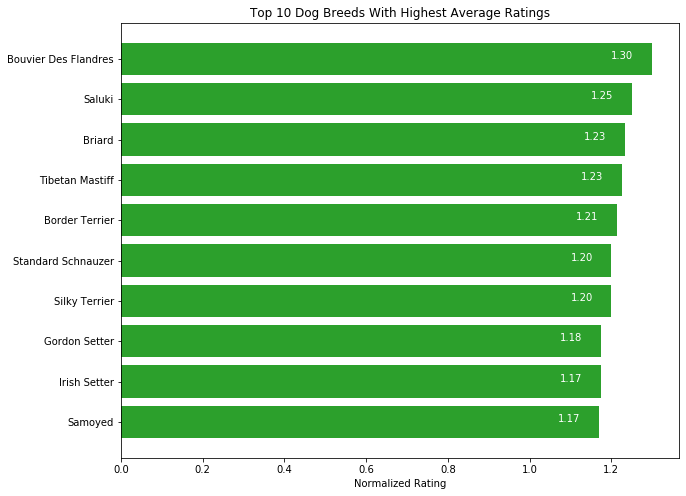

In [1549]:
# Compute mean rating per dog breed
ave_breed = df.groupby('breed')[['rating_normalized']].mean() \
    .reset_index().sort_values(['rating_normalized'], ascending=False).head(10)

# Retweet Count
ave_breed = ave_breed.sort_values(['rating_normalized'], ascending=True)
plt.barh(list(ave_breed['breed']), list(ave_breed['rating_normalized']), color="tab:green")
plt.xlabel('Normalized Rating')
plt.title('Top 10 Dog Breeds With Highest Average Ratings' )
for i, v in enumerate(ave_breed['rating_normalized']):
    plt.text(v-0.1, i, "{0:.2f}".format(v), color='white')
    
plt.rcParams["figure.figsize"] = (10,8);

The dog breeds in the top most liked and most popular list are pretty much the same. The highly rated dog breeds are not necessarily the most popular and most favorite ones. Golden Retriever, by far, is the most popular and well-liked dog breed at WeRateDogs. 

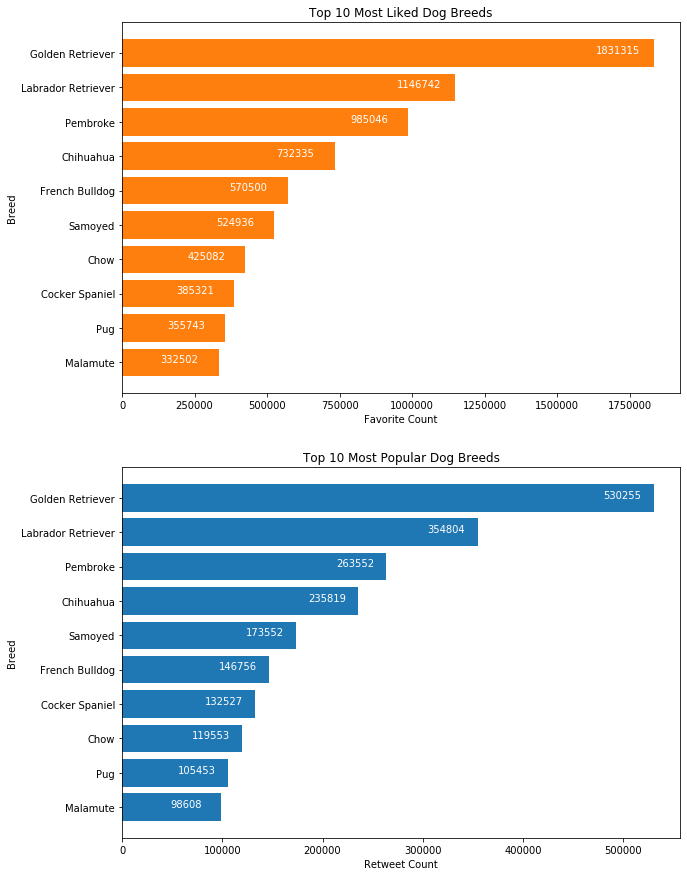

In [1575]:
# Compute totals for favorite and retweet counts 
total_counts = df.groupby('breed')[['favorite_count', 'retweet_count']].sum().reset_index() \
    .sort_values(['favorite_count'], ascending=False).head(10)



# Render visualization
fig, axs = plt.subplots(2,1)


# Favorite Count
total_counts = total_counts.sort_values(['favorite_count'], ascending=True)
axs[0].barh(list(total_counts['breed']), list(total_counts['favorite_count']), color="tab:orange")
axs[0].set_xlabel('Favorite Count')
axs[0].set_ylabel('Breed') 
axs[0].set_title('Top 10 Most Liked Dog Breeds' )
for i, v in enumerate(total_counts['favorite_count'].astype(int)):
    axs[0].text(v-200000, i, str(v), color='white')


# Retweet Count
total_counts = total_counts.sort_values(['retweet_count'], ascending=True)
axs[1].barh(list(total_counts['breed']), list(total_counts['retweet_count']), color="tab:blue")
axs[1].set_xlabel('Retweet Count')
axs[1].set_ylabel('Breed') 
axs[1].set_title('Top 10 Most Popular Dog Breeds' )
for i, v in enumerate(total_counts['retweet_count'].astype(int)):
    axs[1].text(v-50000, i, str(v), color='white')
    
plt.rcParams["figure.figsize"] = (10,15);